# Multi linear model

Single shot multi linear model

In [38]:
import time

import pandas as pd
import tensorflow as tf

import utils

## Dataset

In [39]:
case_1 = pd.read_csv("./datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("./datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("./datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("./datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("./datasets/case_5.csv", index_col='Time')

In [40]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]

In [41]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [42]:
PLOT_COL = "outlet_65"

## Model creation

In [43]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
BATCH_SIZE = 32

features_size = len(label_columns)

print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [44]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    # tf.keras.layers.Dense(10, activation='relu'),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

In [45]:
multi_linear_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [46]:
exec_times = {}

In [47]:
results = {}

## Case 2

In [48]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_2'] = time.time() - start_t

2022-10-30 21:20:45.369911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-30 21:20:45.750161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [49]:
window.train.element_spec

(TensorSpec(shape=(None, 18, 272), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 18, 135), dtype=tf.float32, name=None))

In [50]:
multi_linear_model.build(input_shape=window.example[0].shape)
print(multi_linear_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 272)            0         
                                                                 
 dense_1 (Dense)             (None, 1, 2430)           663390    
                                                                 
 reshape_1 (Reshape)         (None, 18, 135)           0         
                                                                 
Total params: 663,390
Trainable params: 663,390
Non-trainable params: 0
_________________________________________________________________
None


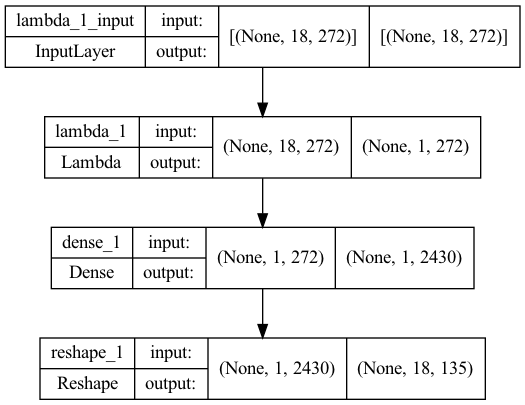

In [51]:
tf.keras.utils.plot_model(multi_linear_model, "./plots/models/multi_lineal.png", show_shapes=True)

label_col_index 64
label_col_index 64
label_col_index 64


2022-10-30 21:20:52.459612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


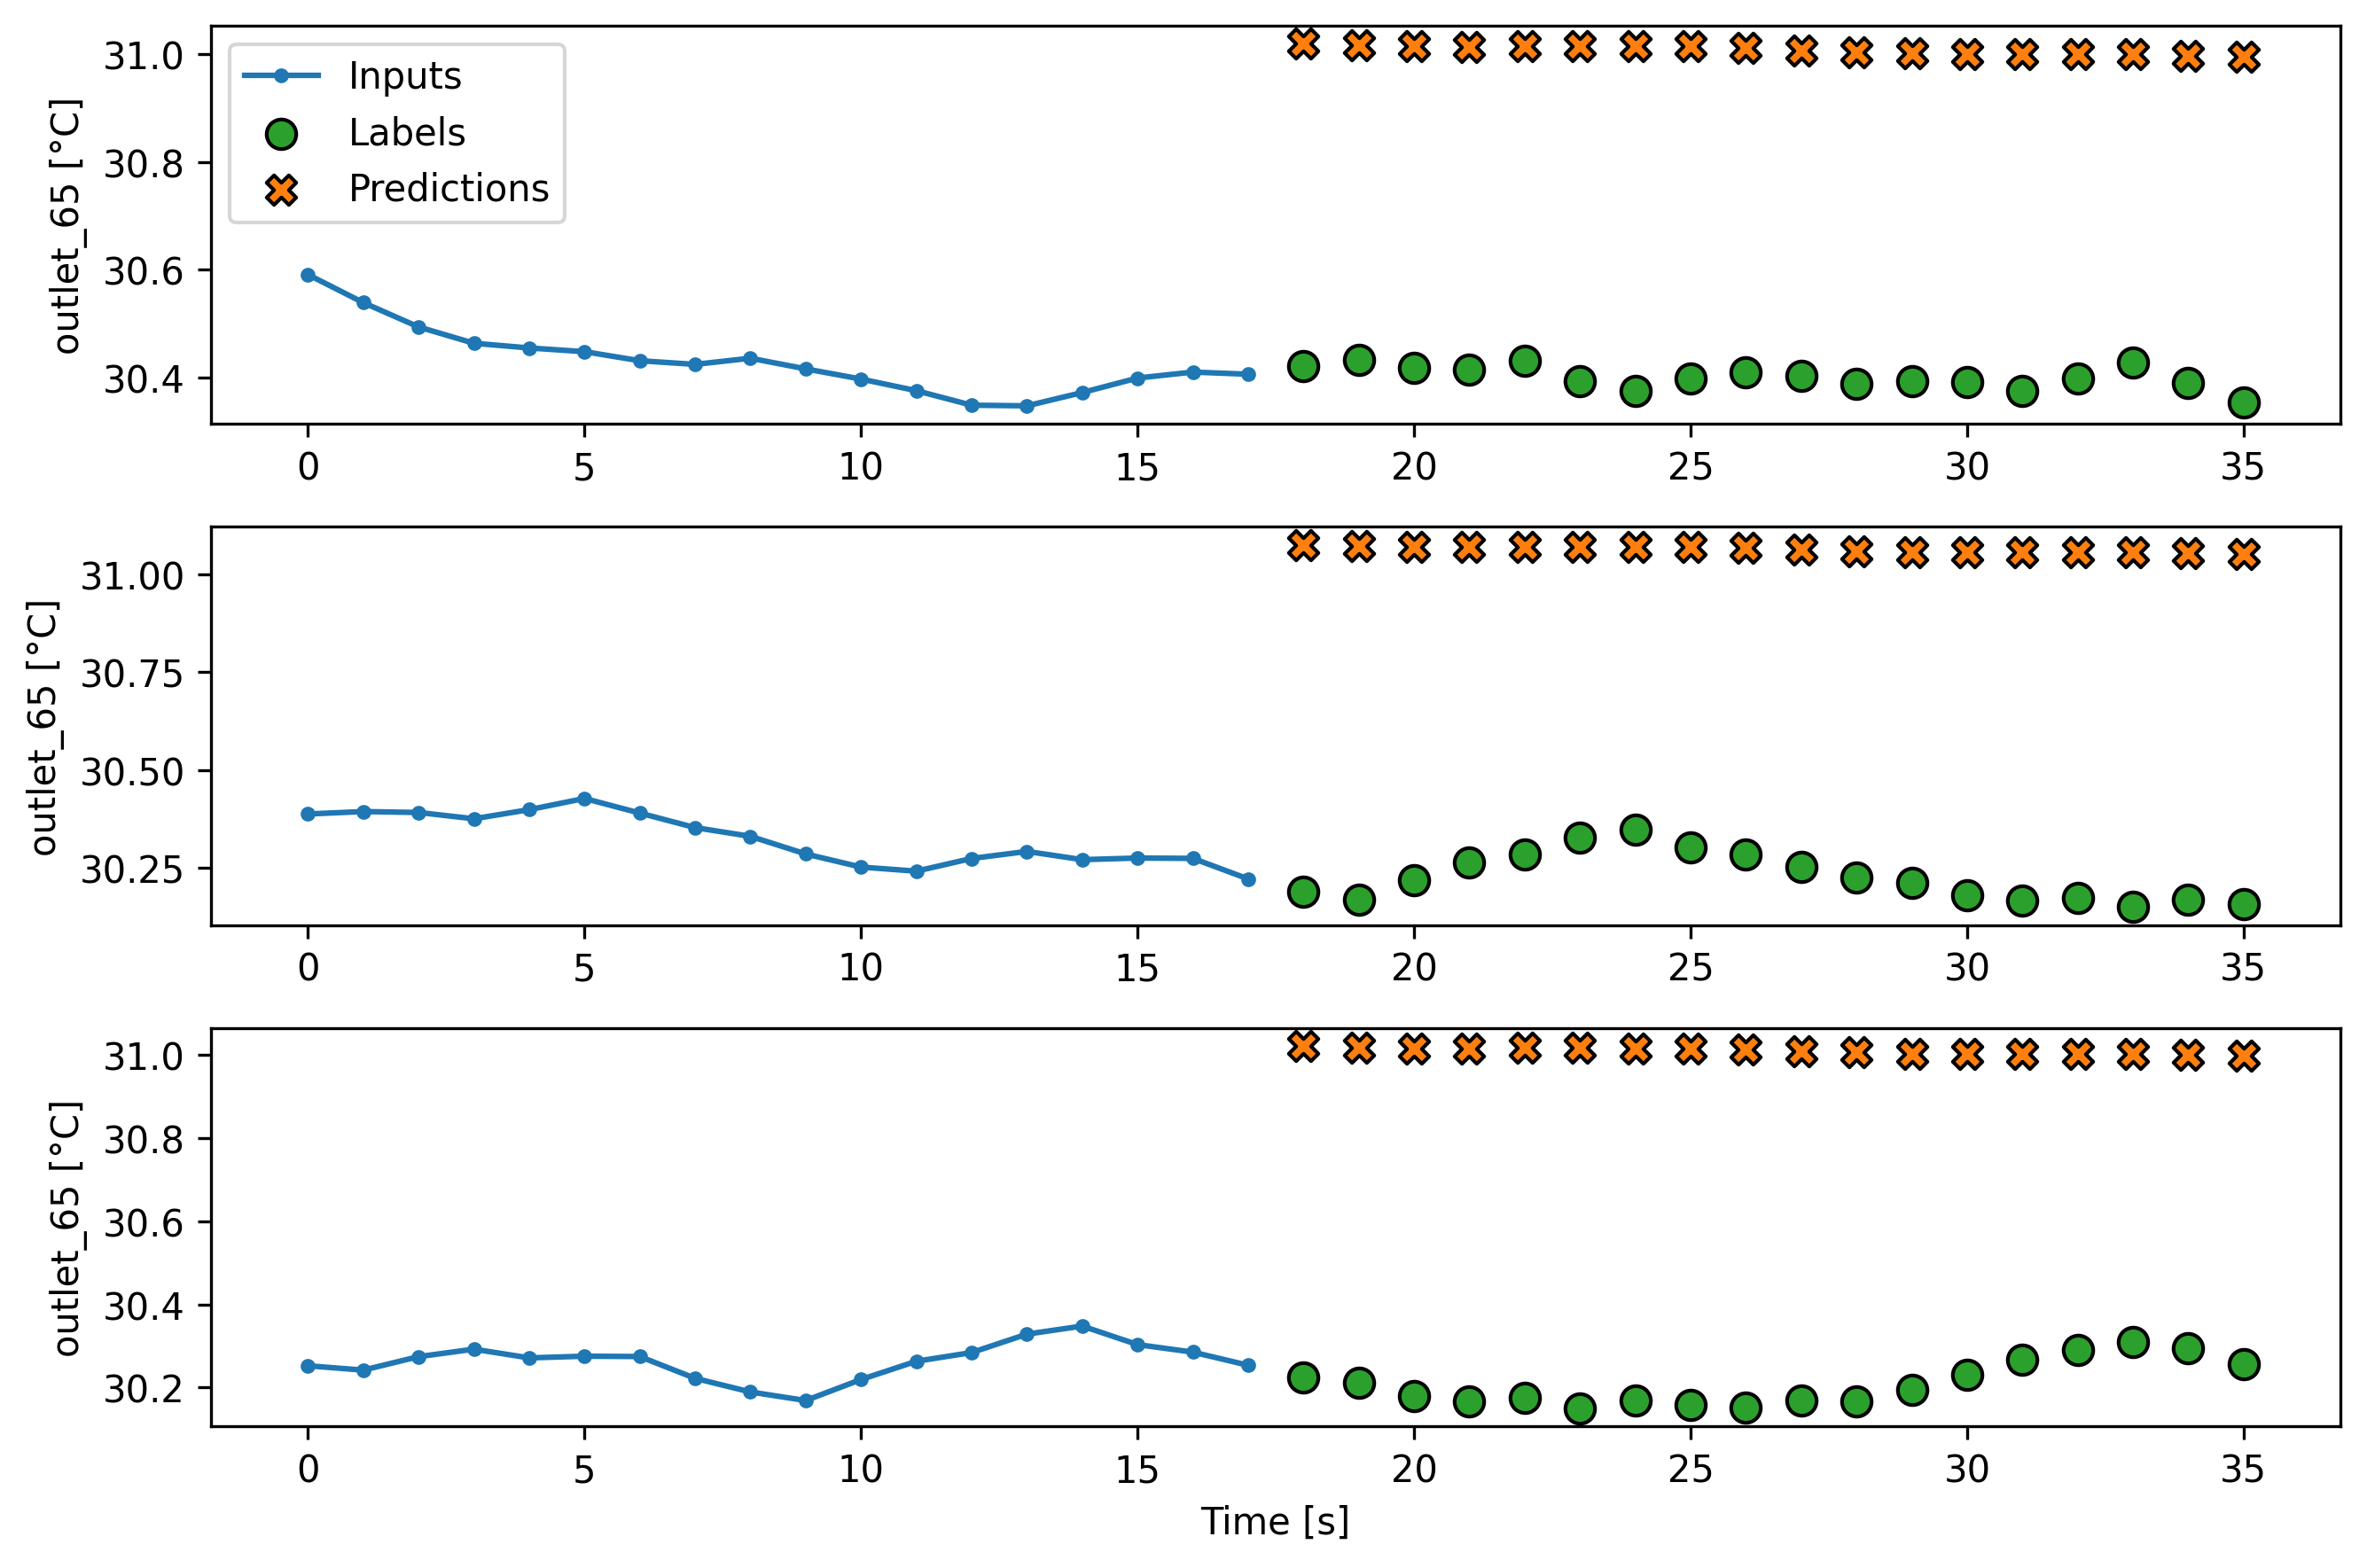

In [52]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

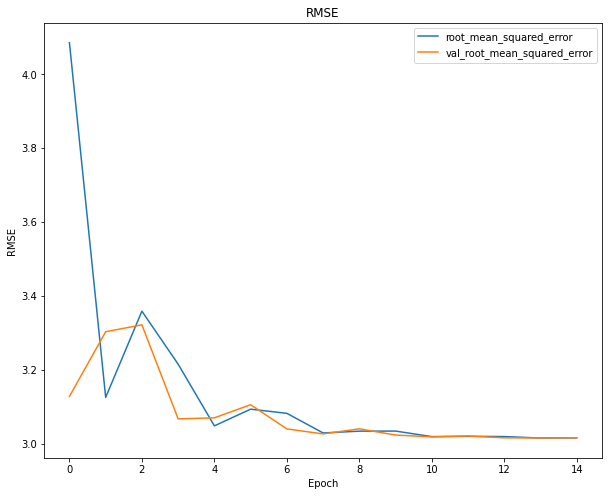

In [53]:
utils.plot_losses(history=history)

In [54]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [55]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_3'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


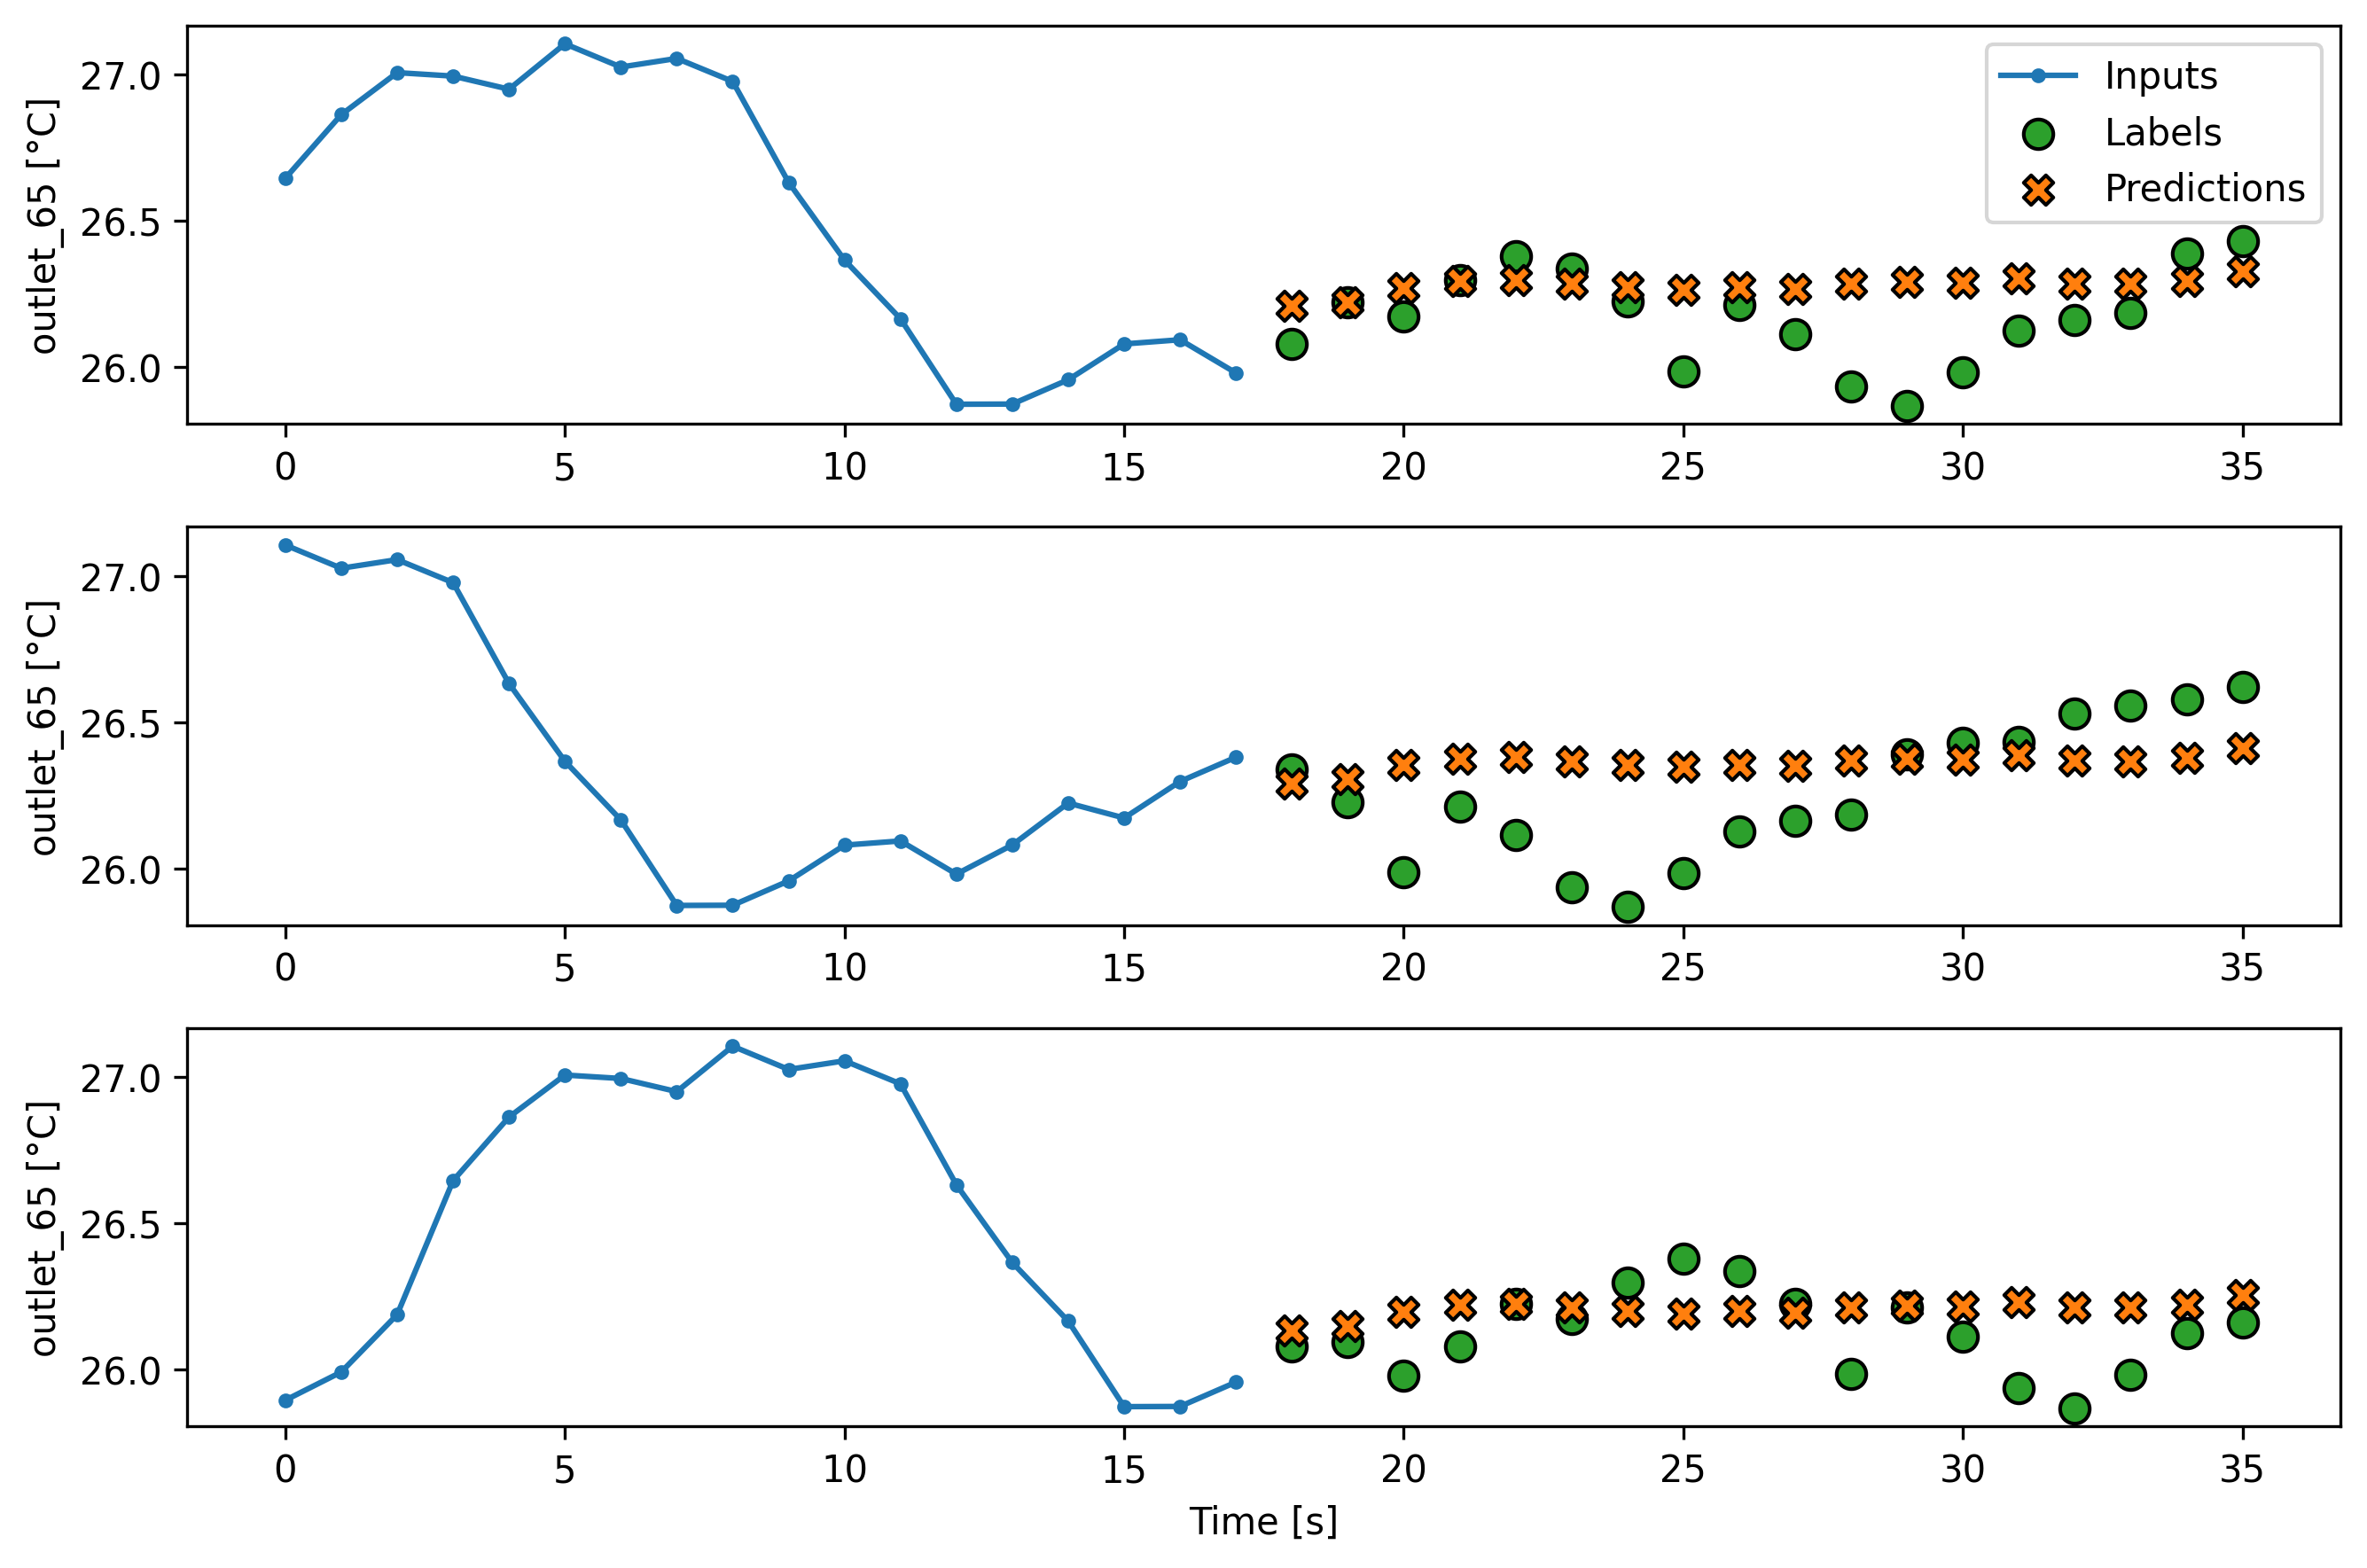

In [56]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

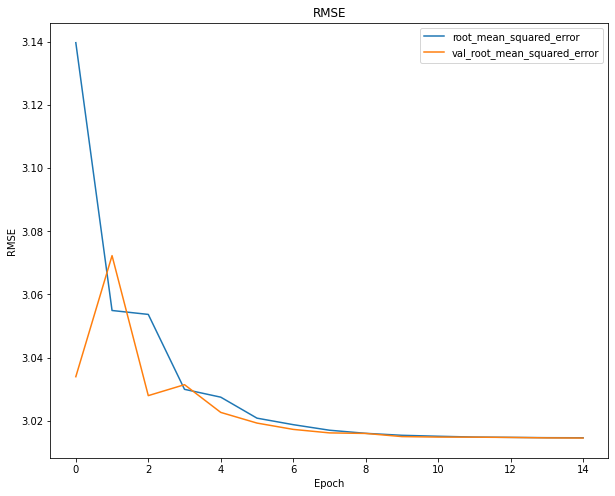

In [57]:
utils.plot_losses(history=history)

In [58]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [59]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)
exec_times['case_4'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


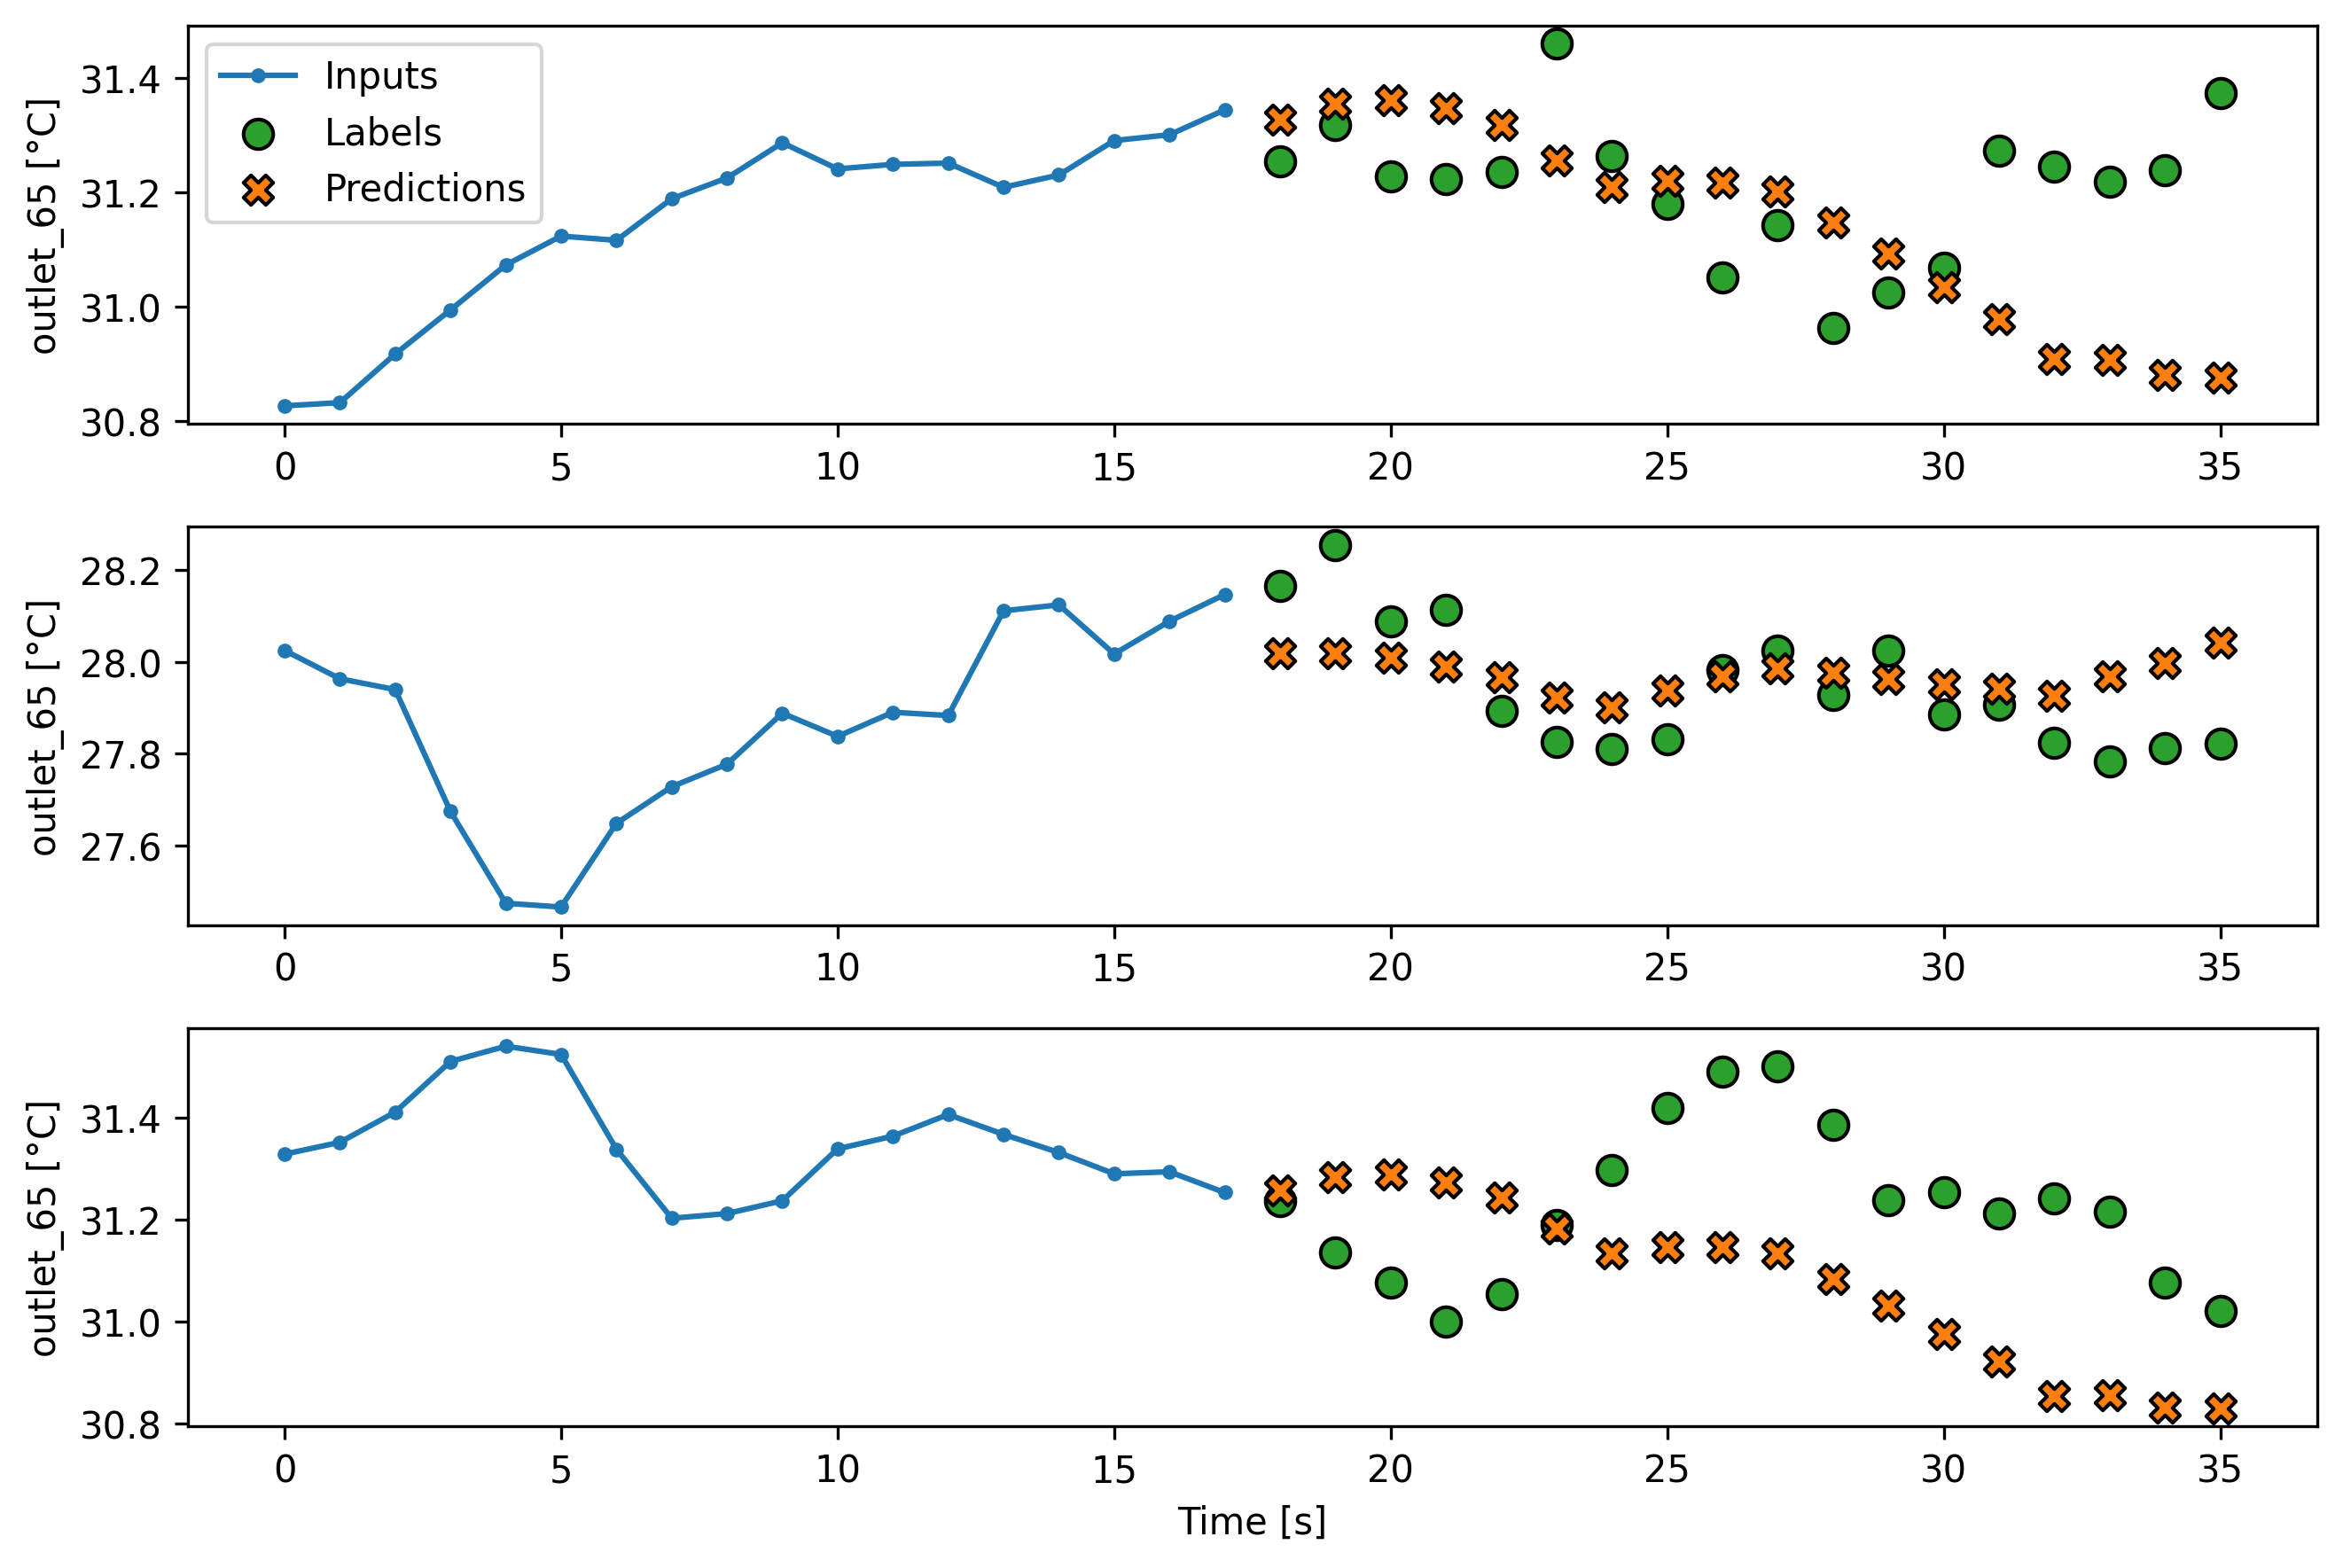

In [60]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

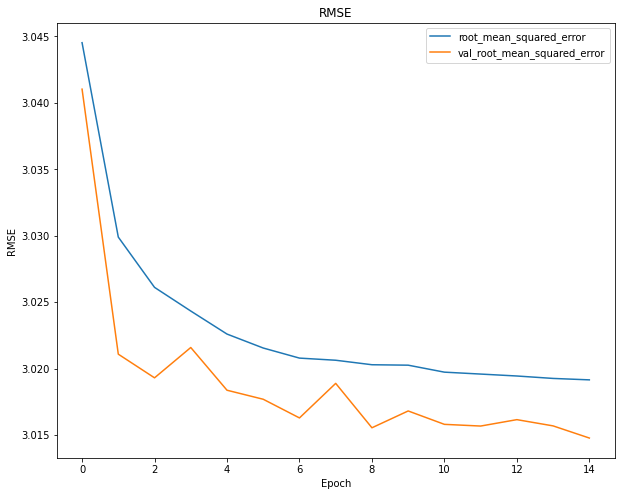

In [61]:
utils.plot_losses(history=history)

In [62]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [63]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_5'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


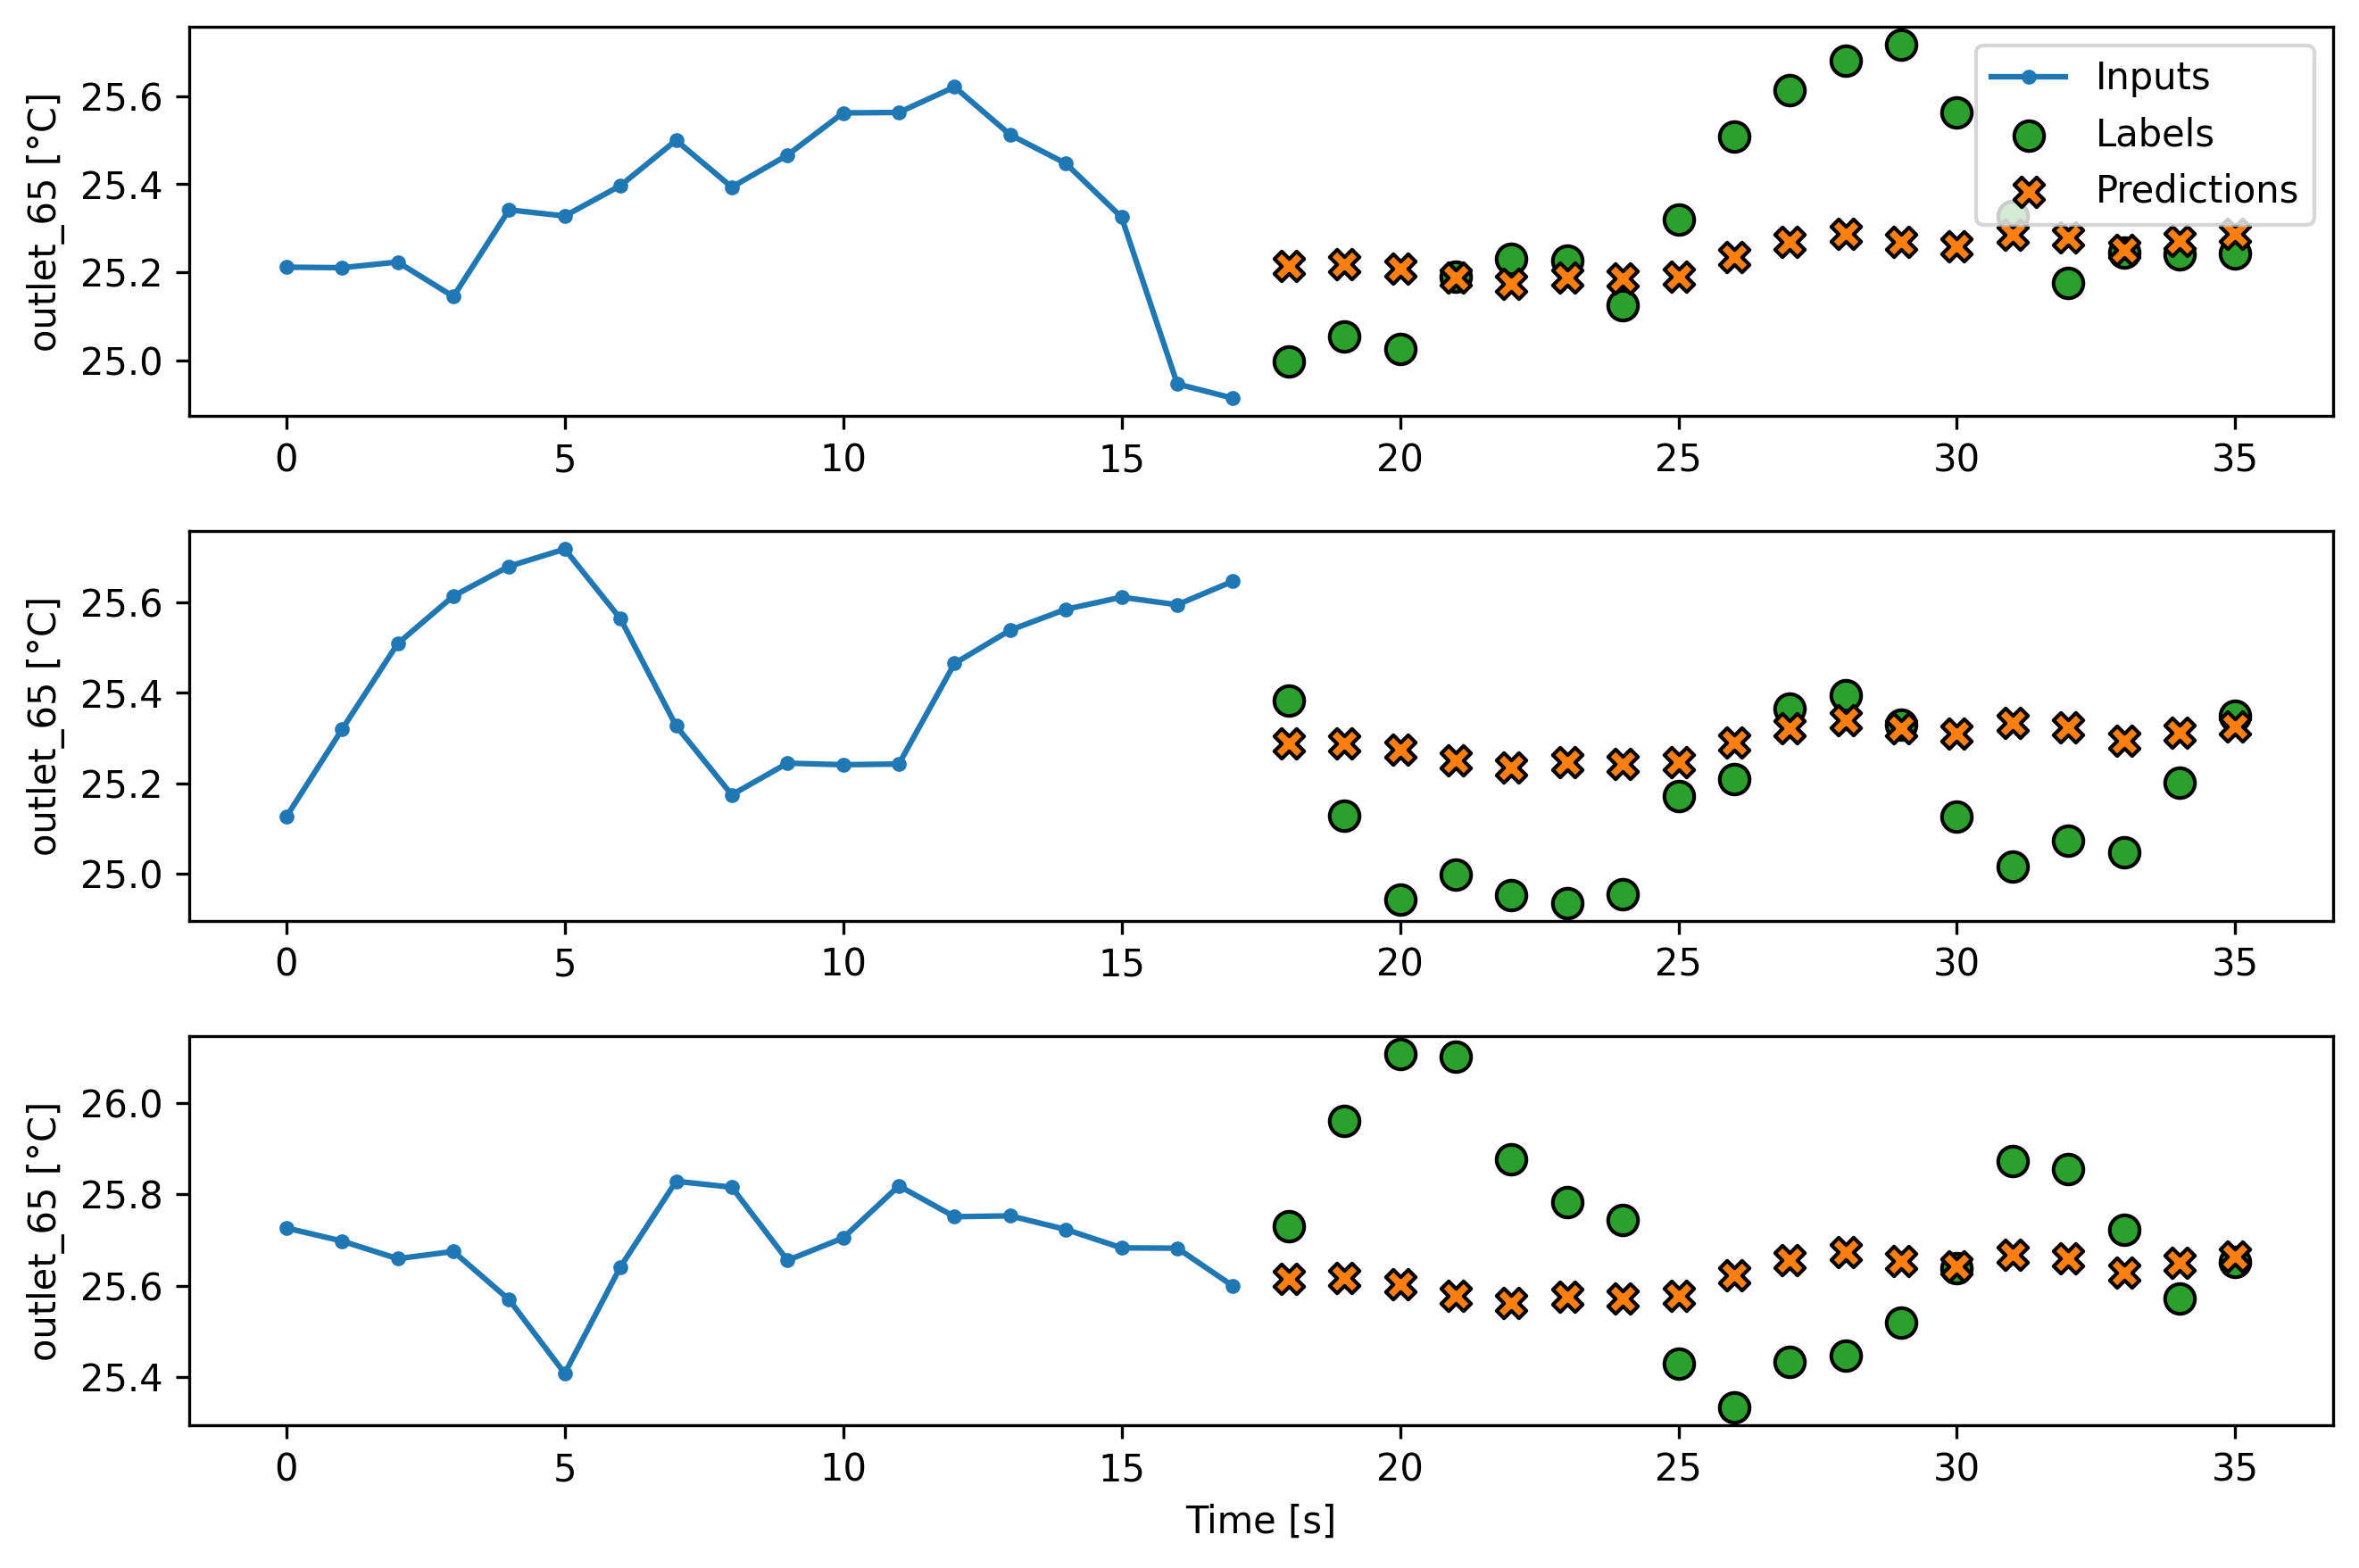

In [64]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

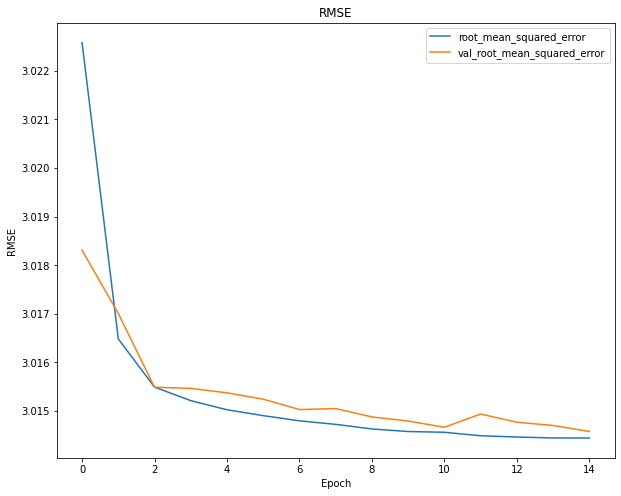

In [65]:
utils.plot_losses(history=history)

In [66]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [67]:
window = utils.WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_results = multi_linear_model.evaluate(window.train)

5/5 [==============================] - 0s 9ms/step - loss: 0.0116 - root_mean_squared_error: 0.1193


## Results

label_col_index 64
label_col_index 64
label_col_index 64


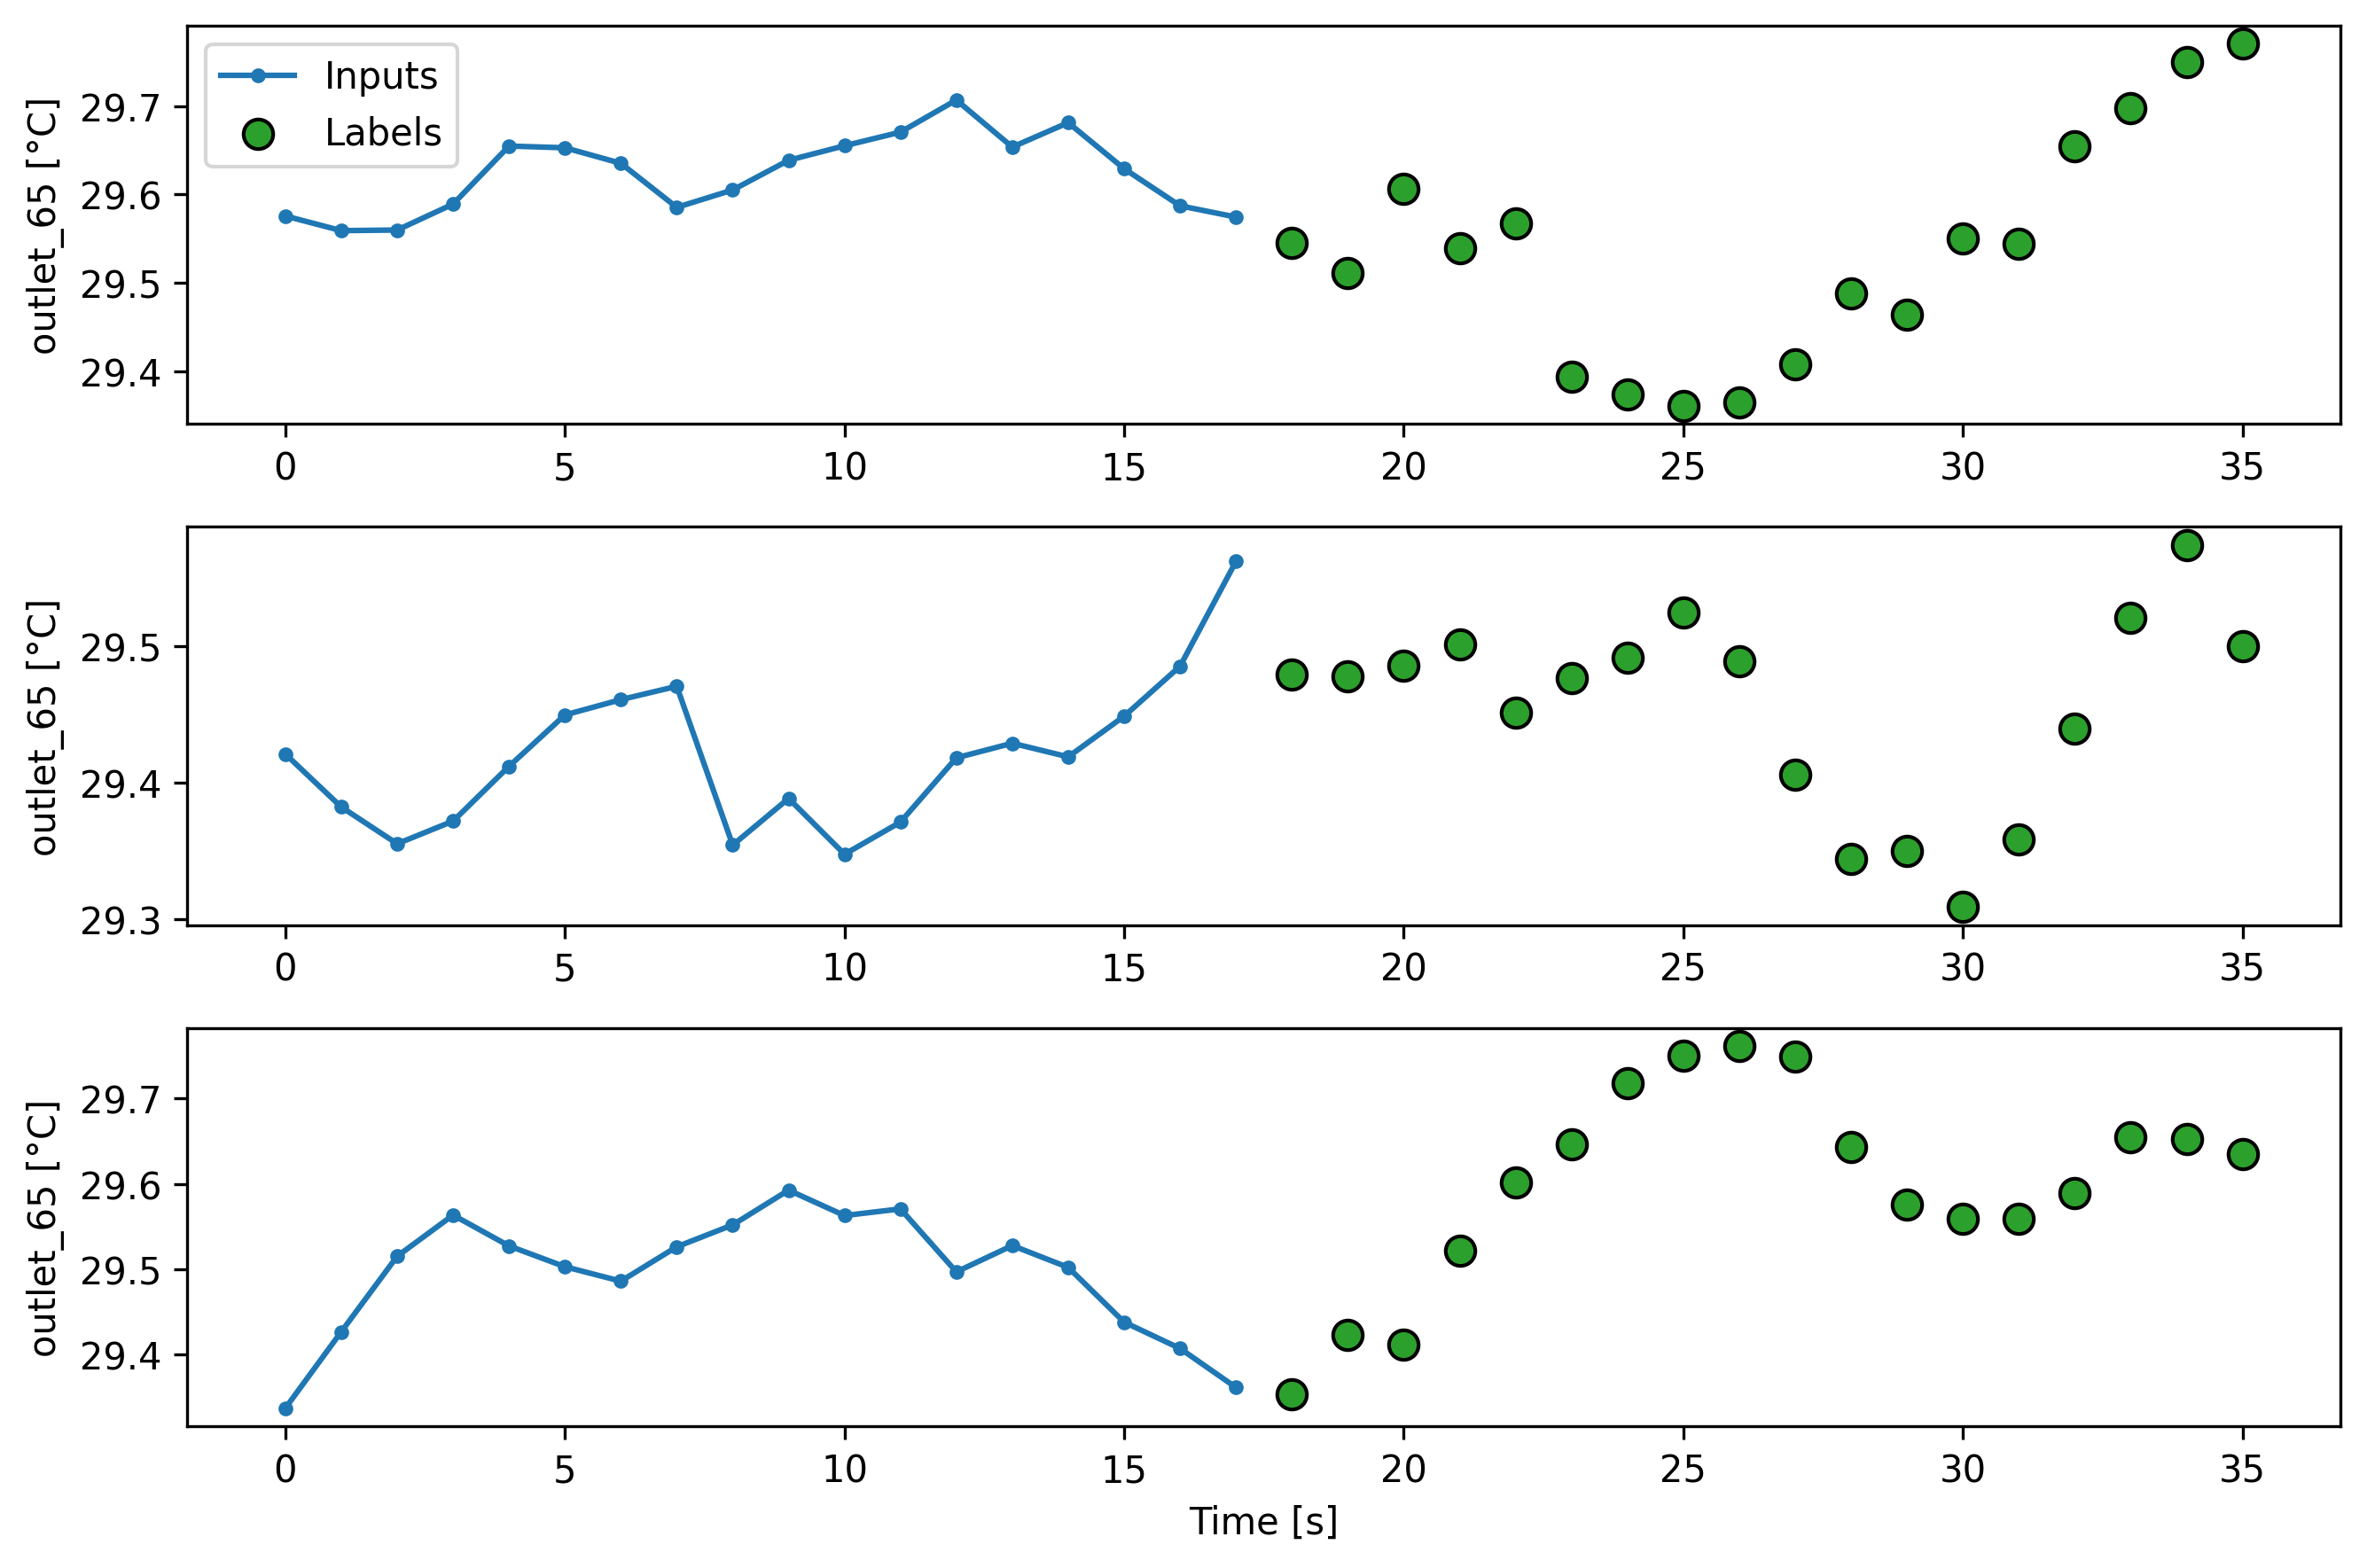

In [68]:
window.plot(
    plot_col=PLOT_COL,
    filename="./plots/window.jpg"
)

label_col_index 64
label_col_index 64
label_col_index 64


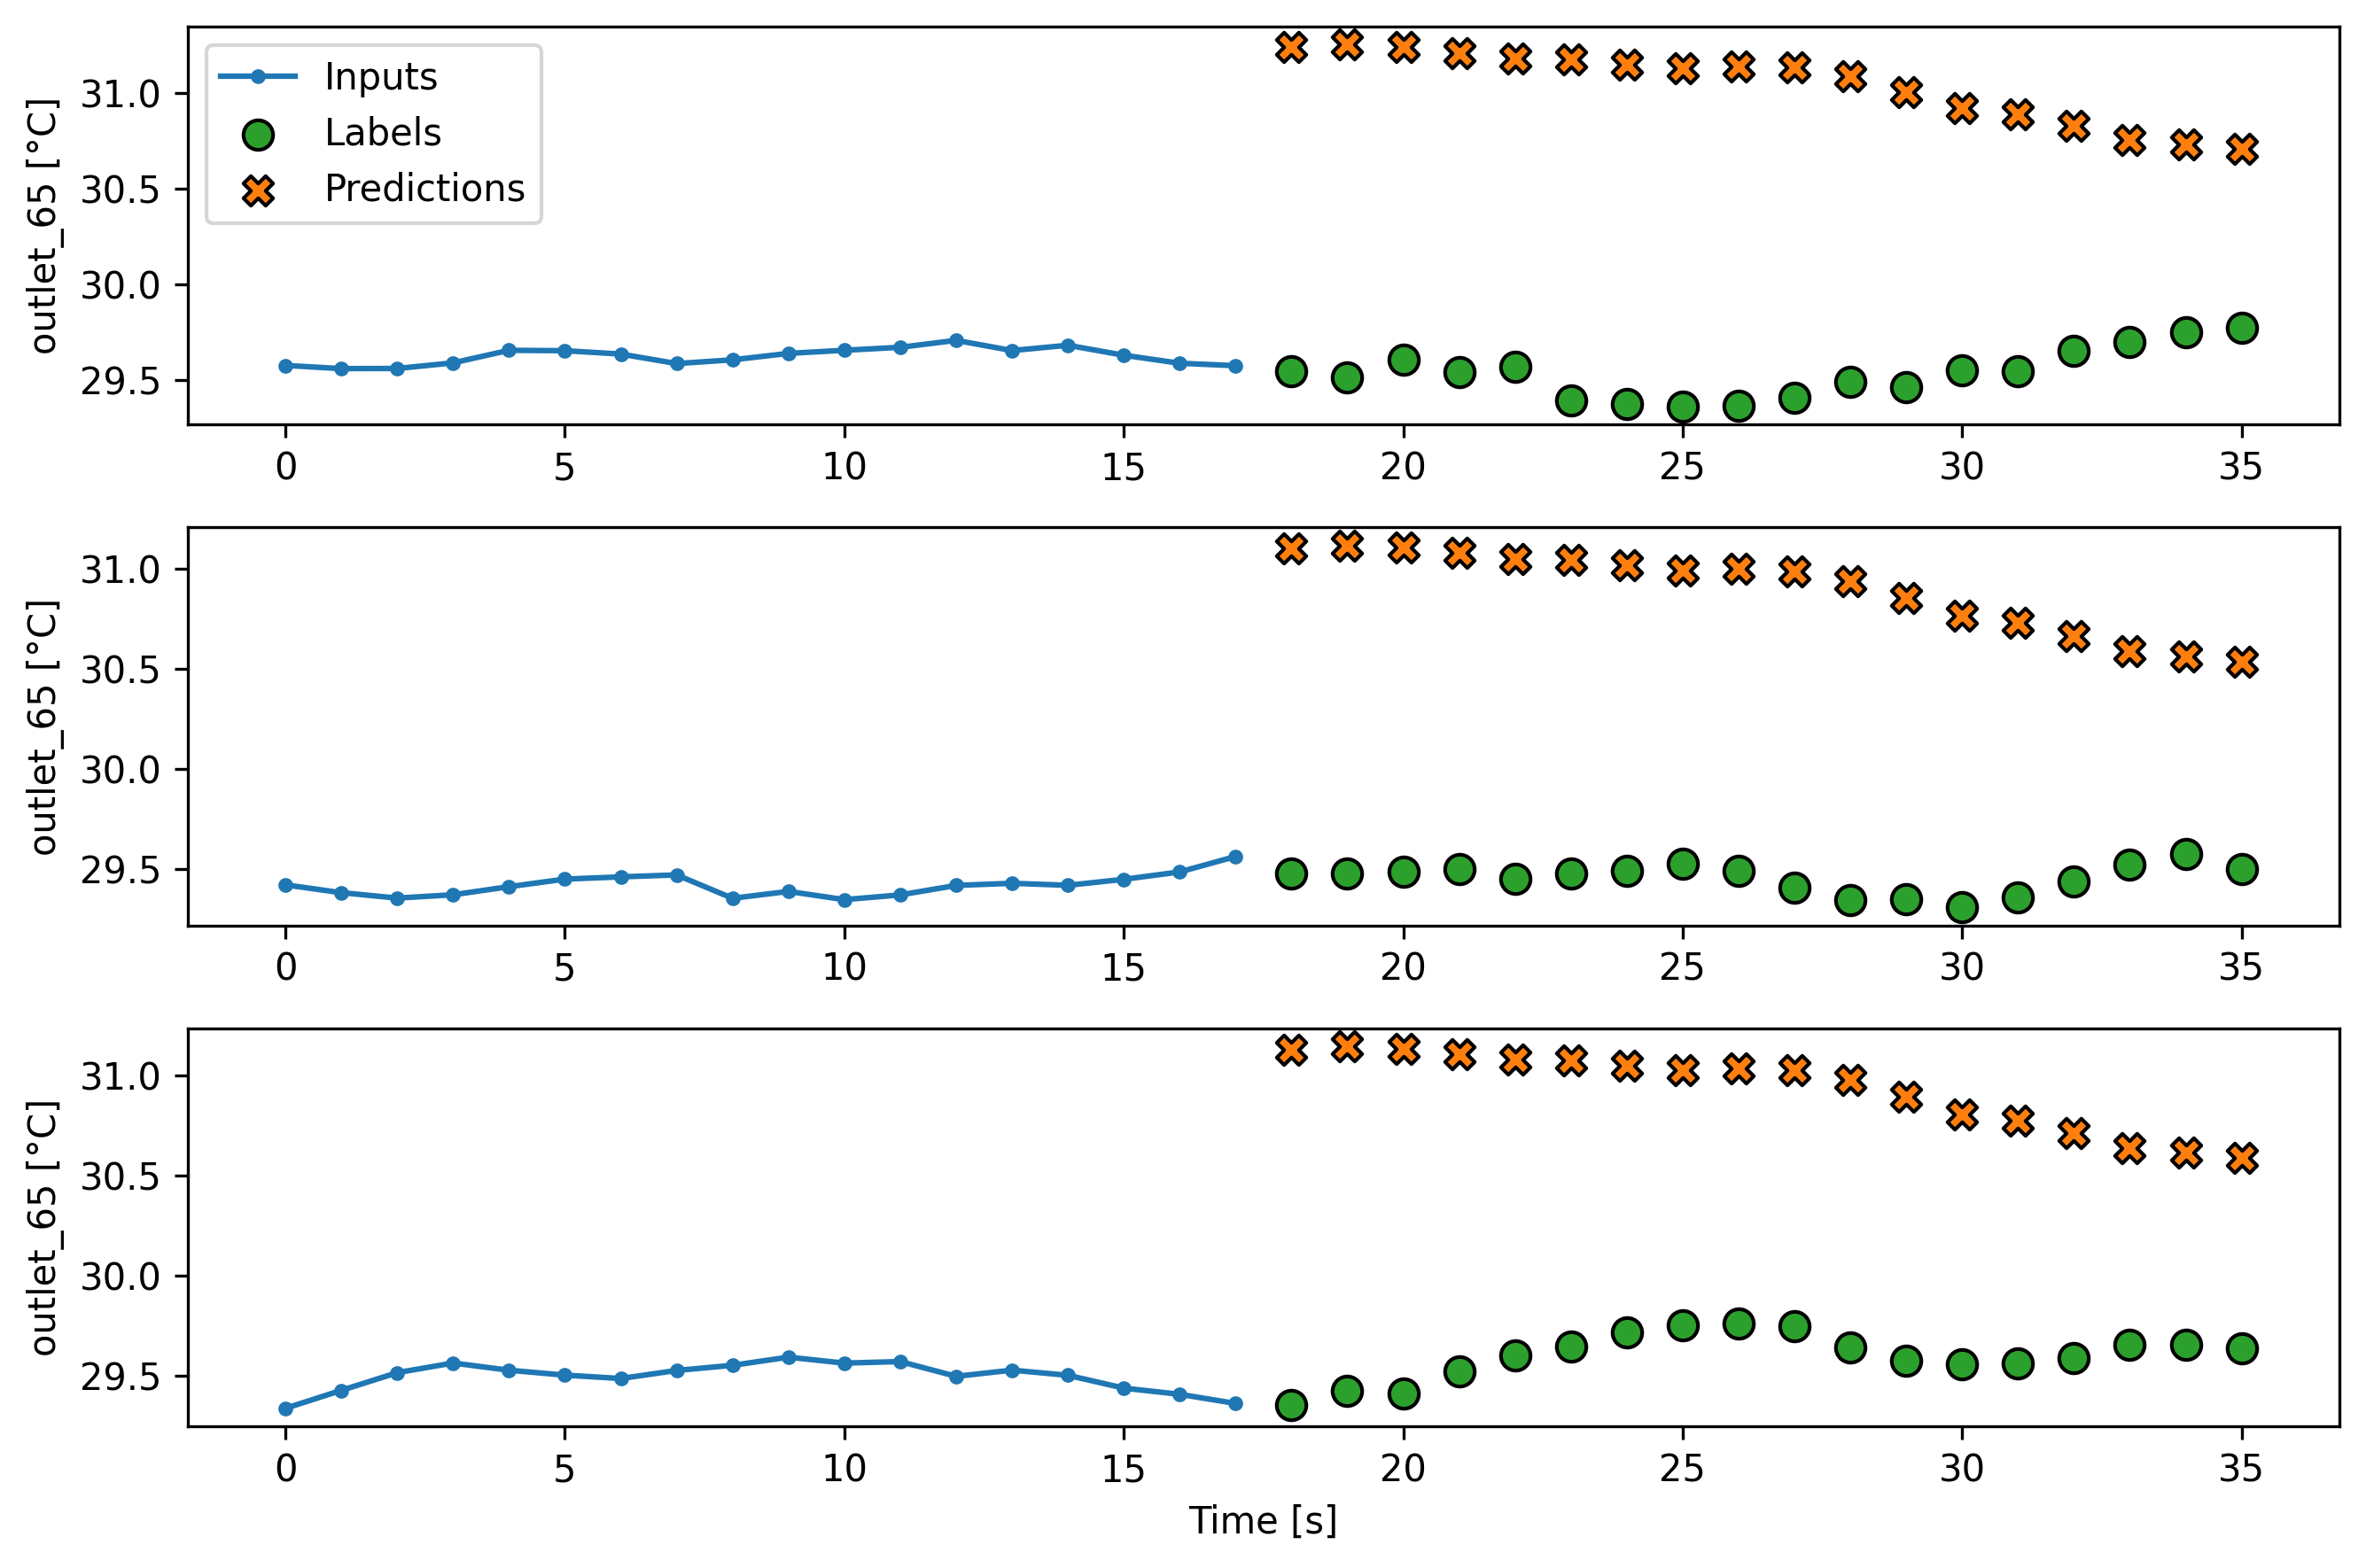

In [69]:
window.plot(
    multi_linear_model,
    plot_col=PLOT_COL,
    filename="./plots/predictions/multi_lineal.jpg"
)

In [70]:
results['test'] = {
    'loss': utils.inverse_transform(test_results[0]),
    'rmse': utils.inverse_transform_rmse(test_results[1])
}

In [71]:
results_df = pd.DataFrame(results).transpose().round(2)
print(results_df.style.format(precision=2).to_latex())

results_df.to_pickle("./results/metrics/multi_linear.pkl")

\begin{tabular}{lrrrr}
 & loss & rmse & val_loss & val_rmse \\
case_2 & 9.09 & 3.02 & 9.09 & 3.02 \\
case_3 & 9.09 & 3.01 & 9.09 & 3.01 \\
case_4 & 9.11 & 3.02 & 9.09 & 3.01 \\
case_5 & 9.09 & 3.01 & 9.09 & 3.01 \\
test & 9.36 & 3.07 & nan & nan \\
\end{tabular}



In [72]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time']).round(2)
print(exec_times_df.style.format(precision=2).to_latex())

exec_times_df.to_pickle("./results/exectimes/multi_linear.pkl")

\begin{tabular}{lr}
 & Time \\
case_2 & 6.99 \\
case_3 & 6.51 \\
case_4 & 6.81 \\
case_5 & 7.87 \\
\end{tabular}



In [73]:
total_t = exec_times_df['Time'].sum()
print("Total training time: %d min %.2f s" % (total_t//60, total_t % 60))

Total training time: 0 min 28.18 s


## Export model

In [74]:
multi_linear_model.save("./models/multi_linear")

INFO:tensorflow:Assets written to: ./models/multi_linear/assets
